In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
import IPython
print(IPython.sys_info())

{'commit_hash': '584151f',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/opt/conda/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.33.0',
 'os_name': 'posix',
 'platform': 'Linux-5.15.65+-x86_64-with-debian-bullseye-sid',
 'sys_executable': '/opt/conda/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.7.12 | packaged by conda-forge | (default, Oct 26 2021, '
                '06:08:53) \n'
                '[GCC 9.4.0]'}


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##loading the dataset

In [6]:
train= pd.read_csv('/kaggle/input/titanic/train.csv')
test= pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##statistical info

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
##Exploratory data analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

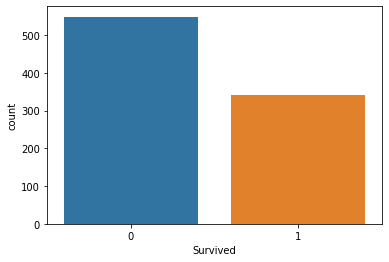

In [9]:
##categorical attributes
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

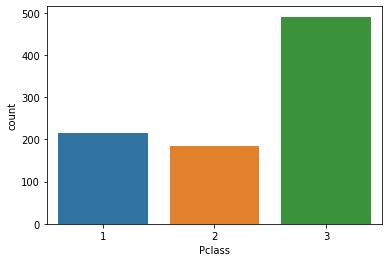

In [10]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

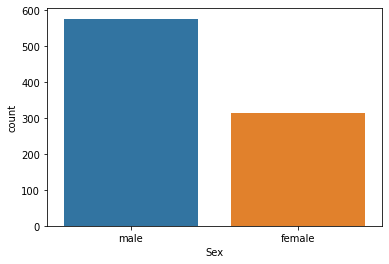

In [11]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

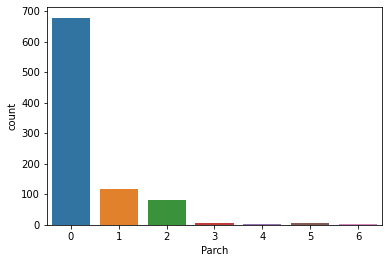

In [12]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

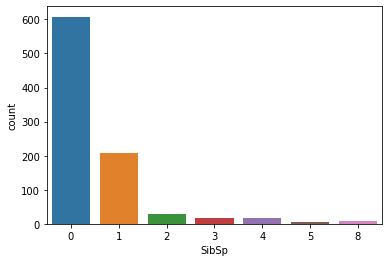

In [13]:
sns.countplot(train['SibSp'])


<AxesSubplot:xlabel='Embarked', ylabel='count'>

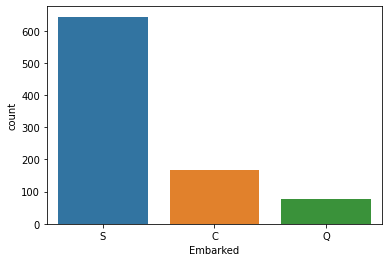

In [14]:
sns.countplot(train['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

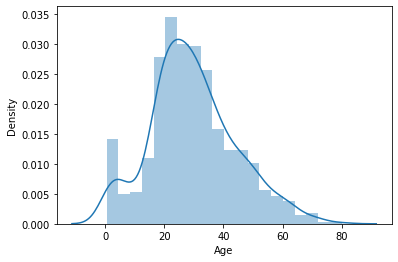

In [15]:
##nummerical attributes
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

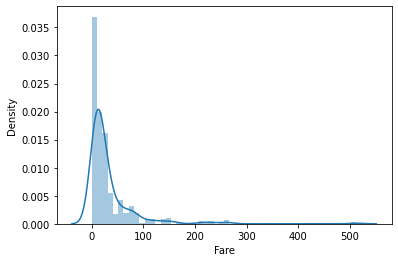

In [16]:
sns.distplot(train['Fare'])

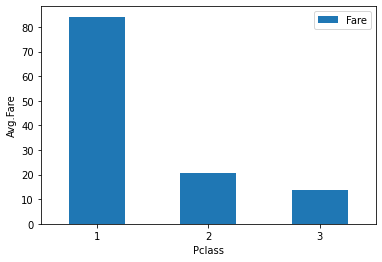

In [17]:
class_fare = train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()


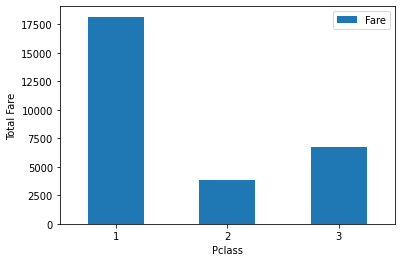

In [18]:
class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()


In [19]:
train_len = len(train)
df= pd.concat([train,test],axis=0)
df= df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
##find the null values
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
df= df.drop(columns=['Cabin'],axis=1)

In [23]:
##fill missing values using mean of the numerical column
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [24]:
df['Embarked'].mode()[0]

'S'

In [25]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

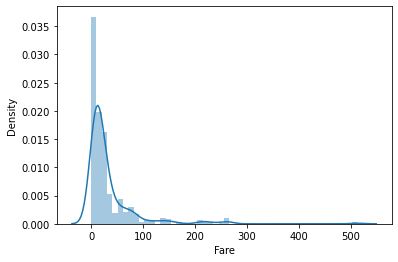

In [26]:
sns.distplot(df['Fare'])
df['Fare']= np.log(df['Fare']+1)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

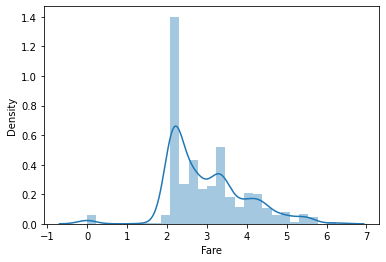

In [27]:
sns.distplot(df['Fare'])

<AxesSubplot:>

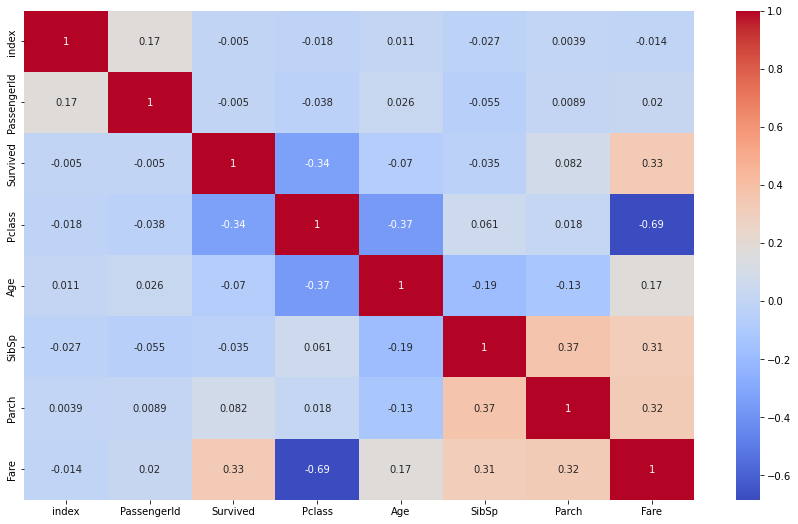

In [28]:
##correlation matrix
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

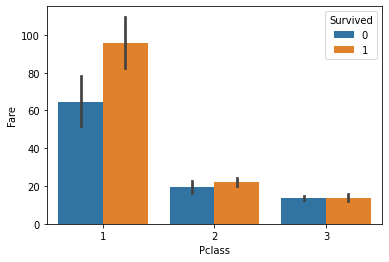

In [29]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

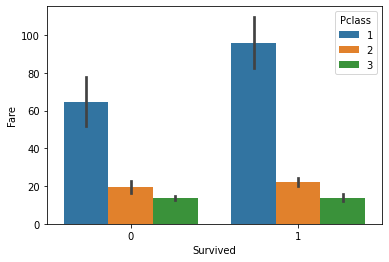

In [30]:
sns.barplot(data=train,x='Survived',y='Fare',hue='Pclass')

In [38]:
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,male,22.0,1,0,2.110213,S
1,1,2,1.0,1,female,38.0,1,0,4.280593,C
2,2,3,1.0,3,female,26.0,0,0,2.188856,S
3,3,4,1.0,1,female,35.0,1,0,3.990834,S
4,4,5,0.0,3,male,35.0,0,0,2.202765,S


In [40]:
#drop unnessary column
df = df.drop(columns=['Name','Ticket'],axis=1)
df.head()

KeyError: "['Name' 'Ticket'] not found in axis"

In [33]:
##label encoding
from sklearn.preprocessing import labelEncoder
cols=['Sex','Embarked']
le= labelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
    df.head()

ImportError: cannot import name 'labelEncoder' from 'sklearn.preprocessing' (/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)